## About Book Crossing Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0

Link to dataset files
http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from scipy.spatial.distance import correlation
import warnings
warnings.filterwarnings('ignore')
import os, sys
import seaborn as sns
import pandas as pd

In [262]:
os.chdir('E:\DSc\BX-CSV-Dump')

### Data loading and preprocessing :-

#### Reference for data loading and preprocessing :-

https://github.com/csaluja/JupyterNotebooks-Medium/blob/master/Book%20Recommendation%20System.ipynb

In [263]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [264]:
print (books.shape)
print (users.shape)
print (ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [265]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [266]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [267]:
pd.set_option('display.max_colwidth', -1)

In [268]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

String present in the year of publication namely:-<br>
1) DK Publishing Inc<br>
2) Gallimard

In [269]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


The information in these coloumns are wrong
<br> Changing the data

In [270]:
books.loc[books.ISBN == '0789466953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953','bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"


In [271]:
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


Now the data is looking better

In [272]:
books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


Again the data is wrong in the respective coloumn

In [273]:
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"

In [274]:
books.loc[books.ISBN == '2070426769',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


Correcting the dtype of year of publication

In [275]:
books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')

In [276]:
print (sorted(books['yearOfPublication'].unique()))


[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


Here the years are starting from 0 which is invalid<br> also the dataset is from 2004

In [277]:
books.loc[(books.yearOfPublication > 2005) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN

In [278]:
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)
books.yearOfPublication.isnull().sum()

0

In [279]:
books.yearOfPublication = books.yearOfPublication.astype(np.int32)

Checking for nan values in publisher coloumn

In [280]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


We can search the value of these publisher and fill it manually or we can drop these 2 rows or we can name it as others

In [281]:
books.loc[books.ISBN == '193169656X','publisher'] = "other"
books.loc[books.ISBN == '1931696993','publisher'] = "other"

In [282]:
books.publisher.isnull().sum()

0

### Exploring Users dataset

In [283]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [284]:
users.dtypes

userID      int64  
Location    object 
Age         float64
dtype: object

In [285]:
users.userID.values

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [286]:
print (sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Here the age start from 0 <br> So i will replace those users whose ages are not valid i.e those who cant read books or those whose age is above 90

In [287]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

In [288]:
users.Age = users.Age.fillna(users.Age.mean())
users.Age = users.Age.astype(np.int32)

In [289]:
print (sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


### Rating dataset :- 

In [290]:
ratings.shape

(1149780, 3)

Ratings dataset should have users and books which exist in our books dataset, unless new users or books are added to books dataset

In [291]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [292]:
ratings_new.shape

(1031136, 3)

In [293]:
n_users = users.shape[0]
n_books = books.shape[0]
print(str(n_users) + "  "  + str(n_books))

278858  271360


In [294]:
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

In [295]:
print (ratings_new.shape)
print (ratings_explicit.shape)
print (ratings_implicit.shape)

(1031136, 3)
(383842, 3)
(647294, 3)


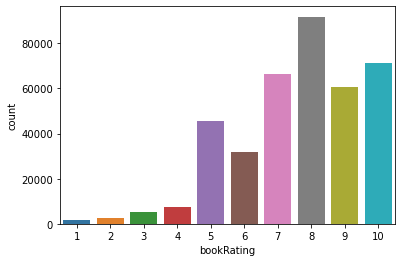

In [296]:
sns.countplot(data=ratings_explicit , x='bookRating')
plt.show()

We will take only explicit rating for our recommender system

### Simple popularity based Recommender System

In [297]:
#At this point , a simple popularity based recommendation system can be built based on count of user ratings for different books
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].sum())
top10 = ratings_count.sort_values('bookRating', ascending = False).head(10)
print ("Following books are recommended")
top10.merge(books, left_index = True, right_on = 'ISBN')

Following books are recommended


,bookRating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


## Building User Based Collaborative Filtering Recommender System

Lets look at our datasets which we will be using

In [298]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


In [299]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [300]:
ratings_explicit.head()

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [301]:
ratings_explicit.dtypes

userID        int64 
ISBN          object
bookRating    int64 
dtype: object

Let's begin by creating an input user to recommend books to:

In [302]:
userInput = [
            {'ISBN':'0316666343', 'rating':8},
            {'ISBN':'0385504209', 'rating':9},
            {'ISBN':'0312195516', 'rating':10},
            {'ISBN':'059035342X', 'rating':8}
         ] 
inputBooks = pd.DataFrame(userInput)
inputBooks

,ISBN,rating
0,0316666343,8
1,0385504209,9
2,0312195516,10
3,059035342X,8


In [303]:
#Filtering out the books by title
inputId = books[books['ISBN'].isin(inputBooks['ISBN'].tolist())]
#Then merging it so we can get the ISBN. It's implicitly merging it by title.
inputBooks = pd.merge(inputId, inputBooks)
#Dropping information we won't use from the input dataframe
inputBooks = inputBooks.drop('yearOfPublication', 1)
inputBooks = inputBooks.drop('publisher', 1)
inputBooks = inputBooks.drop('bookAuthor', 1)

#Final input dataframe
#If a Book you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputBooks

,ISBN,bookTitle,rating
0,0316666343,The Lovely Bones: A Novel,8
1,0312195516,The Red Tent (Bestselling Backlist),10
2,0385504209,The Da Vinci Code,9
3,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),8


#### The users who has rated the same books <br>
Now with the book ID's in our input, we can now get the subset of users that have read and reviewed the books in our input.

In [304]:
userSubset = ratings_explicit[ratings_explicit['ISBN'].isin(inputBooks['ISBN'].tolist())]
userSubset.head()

,userID,ISBN,bookRating
429,276925,0385504209,8
1388,277378,0312195516,7
1584,277427,0385504209,8
1965,277439,0316666343,7
1982,277462,0312195516,10


In [305]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['userID'])

In [306]:
#userSubsetGroup.get_group(276744)

In [307]:
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

In [308]:
userSubsetGroup

[(10560,
         userID        ISBN  bookRating
  41525  10560   0312195516  9         
  41528  10560   0316666343  8         
  41557  10560   0385504209  10        
  41596  10560   059035342X  10        ),
 (11676,
         userID        ISBN  bookRating
  46899  11676   0312195516  10        
  47223  11676   0316666343  5         
  48823  11676   0385504209  9         
  52007  11676   059035342X  10        ),
 (16795,
         userID        ISBN  bookRating
  78381  16795   0312195516  9         
  78485  16795   0316666343  10        
  78991  16795   0385504209  10        ),
 (35859,
          userID        ISBN  bookRating
  157711  35859   0312195516  10        
  157955  35859   0316666343  6         
  160668  35859   059035342X  10        ),
 (52002,
          userID        ISBN  bookRating
  222343  52002   0312195516  10        
  222349  52002   0316666343  10        
  222375  52002   0385504209  10        ),
 (115003,
          userID        ISBN  bookRating
  4829

### Similarity of users to input user

Next, we are going to compare all users (not really all !!!) to our specified user and find the one that is most similar.<br><br>
we're going to find out how similar each user is to the input through the Pearson Correlation Coefficient. It is used to measure the strength of a linear association between two variables.

In [309]:
userSubsetGroup = userSubsetGroup[0:1000]

In [310]:
pearsonCorrelationDict = {}
from math import sqrt
#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='ISBN')
    inputBooks = inputBooks.sort_values(by='ISBN')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the books that they both have in common
    temp_df = inputBooks[inputBooks['ISBN'].isin(group['ISBN'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['bookRating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0


In [311]:
pearsonCorrelationDict.items()

dict_items([(10560, 0.09090909090909091), (11676, 0.5118906968889915), (16795, -0.8660254037844264), (35859, 0.49999999999999933), (52002, 0), (115003, 0.0), (157273, 0.5000000000000213), (187256, -0.866025403784439), (223501, -0.5), (229313, 0.0), (243065, -0.8660254037844264), (246634, 0.8660254037844264), (638, 0), (1075, 0), (5476, 1.0), (7915, 0), (8734, 0), (11224, 0), (13273, 1.0), (15602, 0), (22625, 0), (22818, -1.0), (28289, 1.0), (30735, 0), (39646, 0), (44252, 0), (50895, 1.0), (53174, 0), (53729, 1.0), (55927, 1.0), (56447, 0), (60263, 0), (62862, 1.0), (66323, -1.0), (66942, 0), (68555, 0), (75819, 1.0), (77181, -1.0), (81318, 1.0), (81368, 0), (81492, 0), (81977, 1.0), (86189, -1.0), (88693, -1.0), (89602, 0), (92810, 1.0), (93629, 0), (95359, -1.0), (97874, -1.0), (98391, 1.0), (100846, 0), (101305, -1.0), (103811, 1.0), (105979, -1.0), (107784, 1.0), (108535, 1.0), (110165, -1.0), (113519, 0), (114498, -1.0), (117164, 1.0), (128045, 0), (138777, 0), (139387, -1.0), (14

In [312]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userID'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userID
0,0.090909,10560
1,0.511891,11676
2,-0.866025,16795
3,0.500000,35859
4,0.000000,52002


#### The top x similar users to input user
Now let's get the top 50 users that are most similar to the input.

In [313]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userID
80,1.0,174304
45,1.0,92810
83,1.0,179826
82,1.0,176916
75,1.0,164581


Now, let's start recommending Books to the input user.

#### Rating of selected users to all Books
We're going to do this by taking the weighted average of the ratings of the books using the Pearson Correlation as the weight. But to do this, we first need to get the books readed by the users in our __pearsonDF__ from the ratings dataframe and then store their correlation in a new column called _similarityIndex". This is achieved below by merging of these two tables.

In [314]:
topUsersRating=topUsers.merge(ratings_explicit, left_on='userID', right_on='userID', how='inner')
topUsersRating.head()

,similarityIndex,userID,ISBN,bookRating
0,1.0,174304,0028629019,8
1,1.0,174304,0060245867,8
2,1.0,174304,0060296135,7
3,1.0,174304,0060952970,9
4,1.0,174304,0060973617,7


Now all we need to do is simply multiply the books rating by its weight (The similarity index), then sum up the new ratings and divide it by the sum of the weights.

We can easily do this by simply multiplying two columns, then grouping up the dataframe by ISBN and then dividing two columns:

It shows the idea of all similar users to candidate books for the input user:

In [315]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['bookRating']
topUsersRating.head()

,similarityIndex,userID,ISBN,bookRating,weightedRating
0,1.0,174304,0028629019,8,8.0
1,1.0,174304,0060245867,8,8.0
2,1.0,174304,0060296135,7,7.0
3,1.0,174304,0060952970,9,9.0
4,1.0,174304,0060973617,7,7.0


In [316]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('ISBN').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
ISBN,,
0001944711,0.511891,3.071344
0002005018,0.511891,4.095126
0002118580,0.511891,4.607016
0002176432,0.511891,2.559453
0002184974,0.511891,3.583235


In [317]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['ISBN'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,ISBN
ISBN,,
0001944711,6.0,0001944711
0002005018,8.0,0002005018
0002118580,9.0,0002118580
0002176432,5.0,0002176432
0002184974,7.0,0002184974


#### Now let's sort it and see the top 20 Books that the algorithm recommended

In [318]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,ISBN
ISBN,,
0060935332,10.0,0060935332
043935806X,10.0,043935806X
0425188361,10.0,0425188361
B0000DYXID,10.0,B0000DYXID
0688177026,10.0,0688177026
0689817851,10.0,0689817851
0689808658,10.0,0689808658
0689801505,10.0,0689801505
0689710879,10.0,0689710879


In [319]:
books.loc[books['ISBN'].isin(recommendation_df.head(10)['ISBN'].tolist())]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
1761,0425188361,"Cerulean Sins: An Anita Blake, Vampire Hunter Novel",Laurell K. Hamilton,2003,Berkley Publishing Group
3929,0689710879,The Dark Is Rising,Susan Cooper,1986,Simon Pulse
5506,043935806X,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,2003,Scholastic
9921,0689817851,Go Ask Alice,Anonymous,1998,Simon Pulse
19541,0688177026,Best Friends,Mqp Creative,2000,HarperResource
33588,0060935332,The Master Butchers Singing Club : A Novel,Louise Erdrich,2004,Perennial
34253,0689801505,Chimps Don't Wear Glasses,Laura Numeroff Joffe,1995,Simon &amp; Schuster Children's Publishing
37875,0689808658,The Twelve Days of Christmas : A Pop-Up Celebration,Robert Sabuda,1996,Little Simon
121836,B0000DYXID,A Kid's Guide To How to Save the Planet,Billy Goodman,1994,"iBooks, Inc."
245503,0689707010,The Last Place on Earth,Roland Huntford,1985,Atheneum Books
